In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("credit-card-default.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [4]:
#Create dataframes for X and Y variables
x = df.drop(["defaulted"], axis=1)
y = df[['defaulted']]
print(x.shape)
print(y.shape)

(30000, 24)
(30000, 1)


In [5]:
##Convert x to dummy variables
x=pd.get_dummies(x)

In [6]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 123)

In [7]:
X_train.shape,X_test.shape

((24000, 24), (6000, 24))

In [8]:
model_gini=DecisionTreeClassifier()

In [9]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
preds_gini = model_gini.predict(X_test)

In [11]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[3789  907]
 [ 752  552]]


In [26]:
#Calculate accuracy

print(accuracy_score(y_test,preds_gini))

0.7235


In [13]:
print(metrics.classification_report(y_test,preds_gini))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4696
           1       0.38      0.42      0.40      1304

   micro avg       0.72      0.72      0.72      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.72      0.73      6000



In [15]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [16]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [17]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[4441  255]
 [ 817  487]]


In [18]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8213333333333334
0.8235833333333333


In [19]:
print(metrics.classification_report(y_test,preds_pruned))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.66      0.37      0.48      1304

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [20]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.00036375 0.0008599  0.         0.0002329  0.         0.00017655
 0.05220345 0.01044403 0.00080732 0.00153117 0.00093214 0.00145471
 0.0012313  0.00015781 0.00022928 0.         0.         0.00015997
 0.00023378 0.00383445 0.00066726 0.00028772 0.00015509 0.00019168]


#               Random Forest Classifier

Let's first fit a random forest model with default hyperparameters

In [24]:
#Importng random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

#Running the random forest with default paarameters
rfc=RandomForestClassifier()

In [25]:
#fit

rfc.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
#MAking Predictions
predictions=rfc.predict(X_test)

In [29]:
#Importing Classification report and confusion matrix from sklearn matrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
# report of our default model

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4696
           1       0.61      0.35      0.44      1304

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [32]:
print(accuracy_score(y_test,predictions))

0.8091666666666667


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance

In [34]:
# micro macro and weighted average






#                                  Hyperparameter Tuning

# Tuning max depth

In [36]:
#GridSearchCV to find optimal max_depth 

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for k-fold CV
n_folds=5

#parameters to build the model on
parameters={'max_depth':range(2,20,5)}

#instantiate the model
rf=RandomForestClassifier()

#fit tree on training data
rf=GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy')
rf.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimato

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimato

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [37]:
#scores of GridSearch CV

scores=rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.281616,0.257264,0.014001,0.012001,2,{'max_depth': 2},0.797542,0.808790,0.804375,0.817879,...,0.805333,0.007530,4,0.800458,0.807802,0.805833,0.807041,0.801104,0.804448,0.003066
1,0.348020,0.030300,0.010801,0.001166,7,{'max_depth': 7},0.808165,0.816705,0.813750,0.828506,...,0.817167,0.006691,1,0.832075,0.828949,0.832344,0.830321,0.830790,0.830896,0.001234
2,0.529230,0.024344,0.025001,0.024001,12,{'max_depth': 12},0.809831,0.812539,0.814375,0.821213,...,0.814625,0.003771,2,0.875931,0.878431,0.875417,0.875371,0.878496,0.876729,0.001430
3,0.620636,0.011183,0.025401,0.020801,17,{'max_depth': 17},0.800875,0.809206,0.803542,0.821838,...,0.809042,0.007228,3,0.919996,0.922392,0.918490,0.918494,0.922608,0.920396,0.001805


In above example, we can see that in k-fold cross-validation  ,k=5. and there are 4 levels for max_depth(2,7(5+2),12(7+5),17)

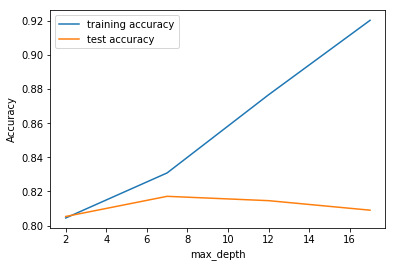

In [41]:
#plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
        label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We need a model which performs well on test. We can see that highest accuracy of our test data is observed at depth=7 and hence,
we choose that depth.

# Tuning n_estimators(default=10)

In [42]:
#GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#specify number of folds for k-fold CV
n_folds=5

#parameters to build the model on
parameters={'n_estimators':range(100,1500,400)}

#instantiate the model
rf=RandomForestClassifier(max_depth=4)           #can write 7 also

#fit tree on training data
rf=GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy')
rf.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
#scores of GridSearch CV

scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.998114,0.055277,0.061003,0.001096,100,{'n_estimators': 100},0.808790,0.813581,0.807500,0.820796,...,0.811583,0.005140,4,0.814209,0.813167,0.814844,0.812458,0.811937,0.813323,0.001076
1,10.238386,0.806276,0.307418,0.021934,500,{'n_estimators': 500},0.808582,0.813789,0.808542,0.818712,...,0.812000,0.003861,1,0.814001,0.812751,0.814167,0.811781,0.813395,0.813219,0.000875
2,17.804018,0.231464,0.532230,0.008085,900,{'n_estimators': 900},0.808790,0.813997,0.808333,0.818712,...,0.811917,0.003945,2,0.813897,0.813167,0.814375,0.811364,0.813656,0.813292,0.001040
3,25.151639,0.048113,0.755443,0.002417,1300,{'n_estimators': 1300},0.807957,0.813789,0.808542,0.818295,...,0.811875,0.003808,3,0.814157,0.812646,0.814167,0.811156,0.813395,0.813104,0.001125


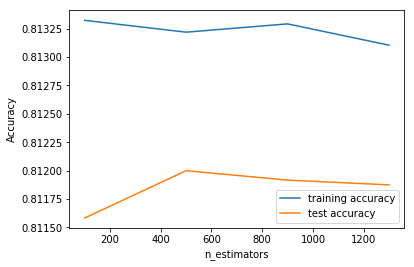

In [47]:
#plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
        label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We get highest accuracy at n_estimators=500

# Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV

In [52]:
#Create the parameter grid based on the results  of random search

param_grid={
    
    'max_depth':[4,8,10],
    'min_samples_leaf':range(100,400,200),
    'min_samples_split':range(200,500,200),
    'n_estimators': [5,10]
    
}

#Create a based model
rf=RandomForestClassifier()

#Instantiate the grid search model

grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [53]:
#Fit the grid search to the data

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   38.8s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

n_jobs= -1 means use all the processors available in our computer . Usually python uses one processor(i3 has 
4 and i5 has 8 processors).n=-1 helps in faster execution 
                                                                                                    

In [54]:
#printing the optimal accuracy score and hyperparameters
print('accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

accuracy of 0.8173333333333334 using {'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 10}


Fit the final model with all best parameter values obtained from GridSearch

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap=True,
                           max_depth=8,
                          min_samples_leaf=100, 
                           min_samples_split=200, 
                           n_estimators=300)

In [63]:
#fit
rfc.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
#predict
predictions=rfc.predict(X_test)

In [65]:

from sklearn.metrics import classification_report,confusion_matrix


In [66]:
#Calculate accuracy

print(accuracy_score(y_test,predictions))

0.818
